In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(style='ticks', context='paper',  palette='Set2', font='Arial')
mpl.rc('pdf', fonttype=42)

In [3]:
data = pd.read_csv('../data/interim/all_condition_gene_zscores.csv')
other_coronavirus = pd.read_csv('../data/processed/other_coronaviruses_zscores_v1.csv')
secondary = pd.read_csv('../data/processed/secondary_screens_z_scores_v3.csv')

## Primary heatmaps

In [5]:
renamed_coronavirus = (other_coronavirus
                       .rename({'SARS1-Bat': 'HKU5-SARS-1-S', 
                                'VSV-SARS2': 'VSV-SARS-2-S', 
                                'MERS-WT': 'MERS', 
                                'MERS-T1015': 'MERS T1015N', 
                                'SARS2': 'SARS-2'}, axis = 1))
renamed_coronavirus = renamed_coronavirus[['Gene', 'SARS-2', 'VSV-SARS-2-S', 
                                           'HKU5-SARS-1-S', 'MERS', 
                                           'MERS T1015N']]

In [6]:
# Load file containing central pathways and the genes in each
central_genes_pathways = pd.read_csv('../data/interim/central_genes_pathways.csv')
central_genes_pathways.head()

,Gene,#term ID,term description,enrichment score,direction,false discovery rate,genes mapped,enrichment_rank,fdr_rank,mean_rank,...,mean_abs_z,median_abs_z,abs_max_z,mean_z,module,module_centrality,module_centrality_rank,module_z_rank,name,label
0,BPTF,GO:0016589,NURF complex,4.46213,negative,0.000023,5,7,204.0,105.5,...,2.558464,2.114502,-4.349961,-2.558464,27,0.429238,1,1,GO:0016589,NURF complex (n=5)
1,HMGXB4,GO:0016589,NURF complex,4.46213,negative,0.000023,5,7,204.0,105.5,...,2.558464,2.114502,-4.349961,-2.558464,27,0.429238,1,1,GO:0016589,NURF complex (n=5)
2,RBBP4,GO:0016589,NURF complex,4.46213,negative,0.000023,5,7,204.0,105.5,...,2.558464,2.114502,-4.349961,-2.558464,27,0.429238,1,1,GO:0016589,NURF complex (n=5)
3,SMARCA1,GO:0016589,NURF complex,4.46213,negative,0.000023,5,7,204.0,105.5,...,2.558464,2.114502,-4.349961,-2.558464,27,0.429238,1,1,GO:0016589,NURF complex (n=5)
4,SMARCA5,GO:0016589,NURF complex,4.46213,negative,0.000023,5,7,204.0,105.5,...,2.558464,2.114502,-4.349961,-2.558464,27,0.429238,1,1,GO:0016589,NURF complex (n=5)


In [7]:
heatmap_input = (renamed_coronavirus.sort_values('SARS-2')
                 .set_index('Gene'))
heatmap_input.head()

,SARS-2,VSV-SARS-2-S,HKU5-SARS-1-S,MERS,MERS T1015N
Gene,,,,,
HIRA,-5.708399,-5.739397,-5.348792,0.766690,-0.261298
CABIN1,-5.377659,-4.277546,-4.862691,2.028947,1.842207
TRIP12,-4.498770,-5.884240,-4.179079,0.122637,-1.520837
BPTF,-4.349961,-5.380691,-2.839760,-3.588138,-4.045731
NONO,-4.338249,-3.626758,-2.553280,0.299898,-0.276293


In [8]:
def make_heatmap(genes, heatmap_input = heatmap_input, cmap='RdBu_r', vmin=-8.5, vmax=8.5,
                 **kwargs):
    fig, ax = plt.subplots(figsize=(2,8))
    sns.heatmap(heatmap_input.loc[heatmap_input.index.isin(genes)], cmap=cmap, vmin=vmin, vmax=vmax,
                center=0, square=True, cbar_kws={"shrink": 0.5}, ax=ax, **kwargs)
    plt.xlabel('')
    plt.ylabel('')
    return fig, ax

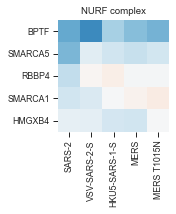

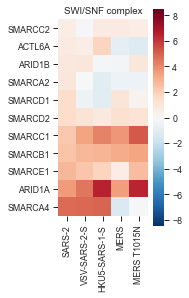

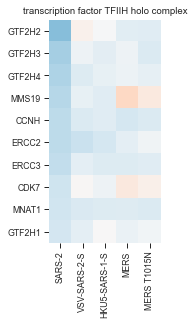

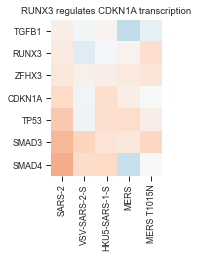

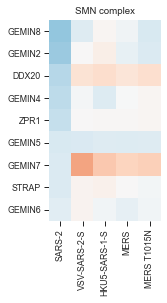

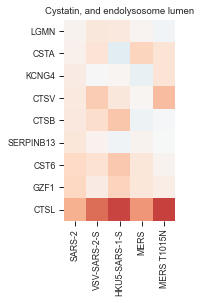

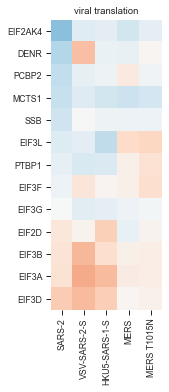

In [9]:
pathways = central_genes_pathways['term description'].unique().tolist()
for pathway in pathways:
    genes = central_genes_pathways.loc[central_genes_pathways['term description'] == pathway, :]['Gene'].tolist()
    if not pathway == 'SWI/SNF complex':
        fig, ax = make_heatmap(genes, cbar=False)
        ax.set_title(pathway)
        fig.savefig(str('../figures/raw-plots/'+pathway+'_all_coronavirus_heatmap.pdf'), transparent=True, bbox_inches='tight')
    else: 
        fig, ax = make_heatmap(genes)
        ax.set_title(pathway)
        fig.savefig(str('../figures/raw-plots/SWI_SNF_all_coronavirus_heatmap.pdf'), transparent=True, bbox_inches='tight')

## Secondary Heatmaps

In [21]:
renamed_secondary = (secondary
                       .rename({'HKU5-SARS-CoV-1-S': 'HKU5-SARS-1-S', 
                                'VSV-SARS-CoV-2-S': 'VSV-SARS-2-S', 
                                'MERS-CoV': 'MERS', 
                                'MERS-CoV T1015N': 'MERS T1015N', 
                                'SARS-CoV-2': 'SARS-2', 
                                'Gene Symbol': 'Gene'}, axis = 1))
renamed_secondary = renamed_secondary[['Gene', 'SARS-2', 'VSV-SARS-2-S', 
                                       'HKU5-SARS-1-S', 'MERS', 'MERS T1015N', 
                                       'IAV-WSN', 'EMCV']]

In [24]:
heatmap_input_seconary = (renamed_secondary.sort_values('SARS-2')
                          .set_index('Gene'))
heatmap_input_seconary.head()

,SARS-2,VSV-SARS-2-S,HKU5-SARS-1-S,MERS,MERS T1015N,IAV-WSN,EMCV
Gene,,,,,,,
HIRA,-11.547425,-15.413665,-18.963849,-0.637182,-3.401838,-8.040243,0.057191
ATRX,-11.216007,-11.511643,-9.530334,-4.353760,-3.494404,-1.758770,-0.130569
PIAS1,-9.203963,-9.140386,-8.344207,-4.730611,-4.997619,-2.445477,-6.039820
UBR4,-9.057975,-10.941145,-7.862583,-0.132752,1.662404,0.977005,1.780412
ZMYM2,-8.457056,-11.689778,-10.189033,-7.873277,-9.138517,-2.796247,-4.178312


In [26]:
print(heatmap_input_seconary.to_numpy().min())
print(heatmap_input_seconary.to_numpy().max())

-18.963848595590946
22.812506461001448


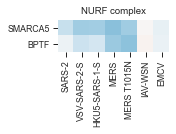

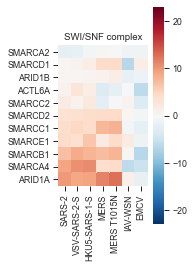

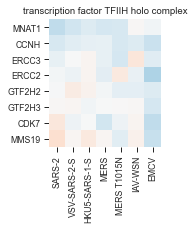

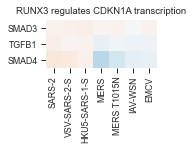

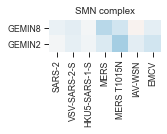

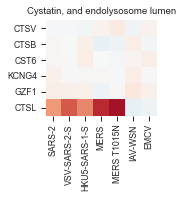

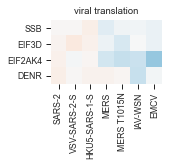

In [29]:
pathways = central_genes_pathways['term description'].unique().tolist()
for pathway in pathways:
    genes = central_genes_pathways.loc[central_genes_pathways['term description'] == pathway, :]['Gene'].tolist()
    if not pathway == 'SWI/SNF complex':
        fig, ax = make_heatmap(genes, cbar=False, heatmap_input=heatmap_input_seconary, vmin=-23, vmax=23)
        ax.set_title(pathway)
        fig.savefig(str('../figures/raw-plots/'+pathway+'_secondary_heatmap.pdf'), transparent=True, bbox_inches='tight')
    else: 
        fig, ax = make_heatmap(genes, heatmap_input=heatmap_input_seconary, vmin=-23, vmax=23)
        ax.set_title(pathway)
        fig.savefig(str('../figures/raw-plots/SWI_SNF_secondary_heatmap.pdf'), transparent=True, bbox_inches='tight')